In [78]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from datetime import date
from cycler import cycler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

%matplotlib inline


In [ ]:
#total number of startups
#min year max year
#total number of investors
#total number of investments
#what variables do we have
#

In [2]:
# we will see the trends in the number of startups across each year

In [3]:
companies=pd.read_csv('ece143/project/companies.csv')

In [4]:
companies.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [8]:
#preprocessing
df=companies.copy()
df=df[pd.notnull(df['founded_at'])]
df['founded_at']=df['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df['founding_year']=df['founded_at'].apply(lambda x:x.year)
df['founding_month']=df['founded_at'].apply(lambda x:x.month)
df['founding_day']=df['founded_at'].apply(lambda x:x.day)

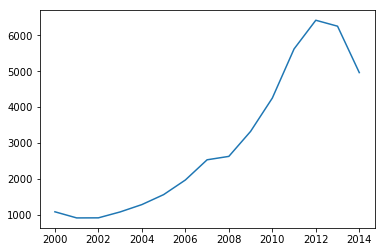

In [12]:
def get_year_wise_number_of_startups_plot(years=range(2000,2015), countries=True):
    count_list=[]
    if countries:
        for year in years:
            count_list.append(df[df['founding_year']==year].shape[0])
    plt.plot(years,count_list)
    #add labels
get_year_wise_number_of_startups_plot()

In [ ]:
df_2014

In [19]:
df_2014=df[df['founding_year']==2014]
country_count_df=df_2014[['name','country_code']].groupby(['country_code']).count()

In [34]:
counts=country_count_df['name'].tolist()
countries=list(country_count_df.index)

In [109]:
def get_pie_data(s,df):
    #assert isinstance(s,basestring)
    assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(df[s]).count(item))
    
    pair = list(zip(label,frequency))
    pair.sort(key=lambda x:x[1], reverse=True)

    count=0
    i = len(pair)-1
    while(i>5):
        count = count + pair[i][1]
        del(pair[i])
        i-=1
    
    pair.append(('Other',count))
    
    return(pair)



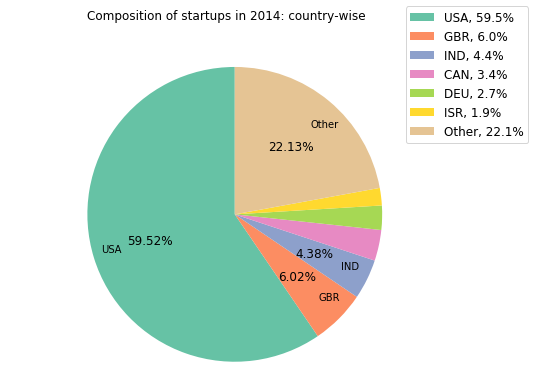

In [111]:
# Draw pie chart for the country data using pyplot.pie for 2014
def plot_pie_chart(labels,sizes,plot_title):
        def autopct_generator(limit):
            """Remove percent on small slices."""
            def inner_autopct(pct):
                return ('%.2f%%' % pct) if pct > limit else ''
            return inner_autopct

        total = sum(sizes)
        label_cond=[]
        for i in range(len(labels)):
            if sizes[i]>0.04*total:
                label_cond.append(labels[i])
            else:
                label_cond.append('')           
        fig,ax = plt.subplots(figsize=(8, 6))
        theme = plt.get_cmap('Set2')
        ax.set_prop_cycle( cycler('color',[theme(1.*i/len(pair)) for i in range(len(pair))]))
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 1, box.height])
        _, _, autotexts = ax.pie(sizes, labels=label_cond, labeldistance=0.8, 
                                 autopct=autopct_generator(4), startangle=90, radius=1.8 * 1000)
        for autotext in autotexts:
            autotext.set_size('large')
        ax.axis('equal')
        plt.legend(
            loc='upper left',
            labels=['%s, %1.1f%%' % (
                l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
            prop={'size': 12},
            bbox_to_anchor=(0.8, 1),
            bbox_transform=fig.transFigure
        )
        plt.suptitle(plot_title)
        plt.show()

pair = get_pie_data('country_code',df_2014)
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of startups in 2014: country-wise')
    

In [ ]:
# country wise trends for first 5

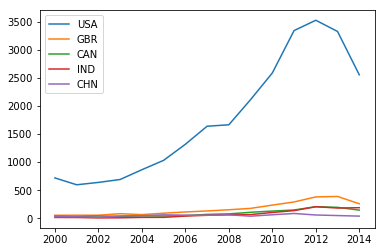

In [62]:
def get_top_5_country_plot(years=range(2000,2015), countries=list(zip(*pair))[0][:5]):
    count_list=[[] for i in range(len(countries))]
    for i in range(len(countries)):
        for year in years:
            count_list[i].append(df[(df['founding_year']==year)&(df['country_code']==countries[i])].shape[0])
    #plt.plot(years,count_list)
    #add labels
    #x = np.linspace(2000, 2015, 15)
    fig, ax = plt.subplots()
    for i in range(len(countries)):
        ax.plot(range(2000,2015), count_list[i], label=countries[i])
    #ax.axis('equal')
    leg = ax.legend()
    #print(count_list)
get_top_5_country_plot()

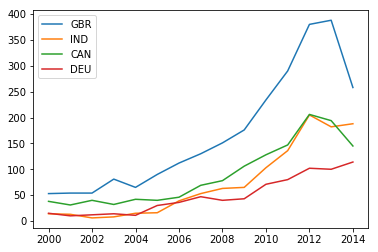

In [115]:
def get_top_5_country_plot(years=range(2000,2015), countries=list(zip(*pair))[0][1:5]):
    count_list=[[] for i in range(len(countries))]
    for i in range(len(countries)):
        for year in years:
            count_list[i].append(df[(df['founding_year']==year)&(df['country_code']==countries[i])].shape[0])
    #plt.plot(years,count_list)
    #add labels
    #x = np.linspace(2000, 2015, 15)
    fig, ax = plt.subplots()
    for i in range(len(countries)):
        ax.plot(range(2000,2015), count_list[i], label=countries[i])
    #ax.axis('equal')
    leg = ax.legend()
    #print(count_list)
get_top_5_country_plot()

In [ ]:
# region wise percentage of number of startups in USA

In [80]:
# country wise percentage of number of startups
# Helper funtion to process the data in terms of state code
def state_data(s,df):
    #assert isinstance(s, basestring)
    #assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(df[s]).count(item))
    
    pair = list(zip(label,frequency))
    pair.sort(key=lambda x:x[1], reverse=True)
    #remove sorting as it is not needed
    state=list(range(len(pair)))
    num=list(range(len(pair)))
    for i in range(len(pair)):
        state[i] = pair[i][0]
        num[i] = pair[i][1]
    state_df = pd.DataFrame(
    {'state_code': state,
     'number_startups': num,
    })
    
    return(state_df)

In [122]:
def plot_choropleth(df,plot_title):
        init_notebook_mode(connected=True)
        #companies = companies[companies['founded_year'] == 2014]
        #usa = companies[companies['country_code']=="USA"]
        #df =state_data('state_code',usa)

        scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                    [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

        data = [ dict(
                type='choropleth',
                colorscale = scl,
                autocolorscale = False,
                locations = df['state_code'],
                z = df['number_startups'].astype(float),
                locationmode = 'USA-states',
                marker = dict(
                    line = dict (
                        color = 'rgb(255,255,255)',
                        width = 2
                    ) ),
                colorbar = dict(
                    title = "Number of Startups")
                ) ]

        layout = dict(
                title = plot_title,
                geo = dict(
                    scope='usa',
                    projection=dict( type='albers usa' ),
                    showlakes = True,
                    lakecolor = 'rgb(255, 255, 255)'),
                     )

        fig = dict( data=data, layout=layout )
        plotly.offline.iplot( fig, filename='d3-cloropleth-map' )

In [123]:
df_2014_US=df_2014[df_2014['country_code']=='USA']
plot_choropleth(state_data('state_code',df_2014_US),'2014 US New Startups by State')

In [ ]:
# try to see if a particular region has startups of a particular kind

In [120]:
df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founding_year,founding_month,founding_day
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04 00:00:00,2014-03-01,2014-10-14,2014,9,4
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01 00:00:00,2008-03-19,2008-03-19,2007,1,1
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01 00:00:00,2014-07-24,2014-07-24,2010,1,1
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01 00:00:00,2009-09-11,2009-12-21,1997,1,1
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01 00:00:00,2013-01-03,2015-11-09,2011,1,1


In [128]:
def particular_category(companies,name,title):
    companies = companies[pd.notnull(companies['country_code'])]
    usa = companies[companies['country_code']=="USA"]
    usa = usa[pd.notnull(usa['category_list'])]
    bf2002 = usa[ (usa['category_list'].str.contains(name, case=False))]
    #ft_af2002 = usa[(usa['founded_year'] > 2002) & (usa['category_list'].str.contains('fintech', case=False))]
    plot_choropleth(state_data('state_code',bf2002),title)
particular_category(df,'fintech','Fintech companies')

In [129]:
particular_category(df,'software','Fintech companies')

In [145]:
particular_category(df,'chemicals','Fintech companies')

In [142]:
particular_category(df,'farming','Fintech companies')

In [149]:
particular_category(df,'Oil & Gas','Fintech companies')

In [159]:
particular_category(df,'textiles','Fintech companies')

In [173]:
particular_category(df,'food processing','Fintech companies')

In [ ]:
# which month of the year

In [186]:
df=df[~((df['founding_day']==1)&(df['founding_month']==1))]

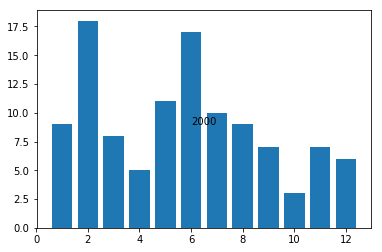

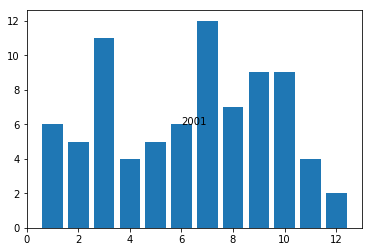

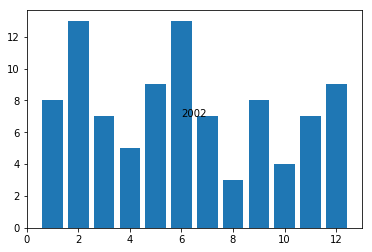

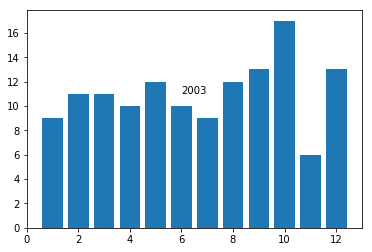

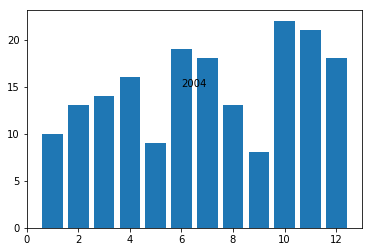

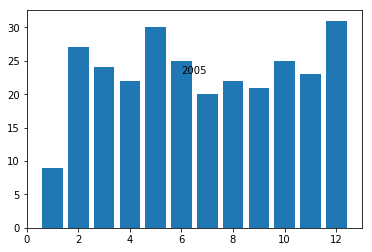

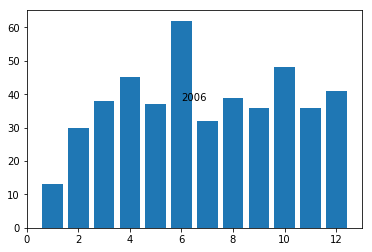

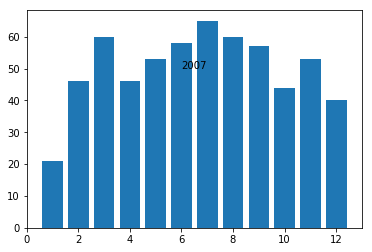

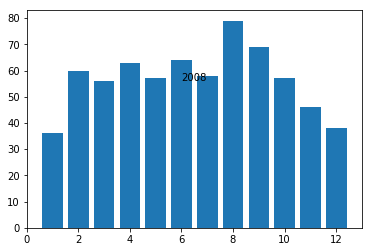

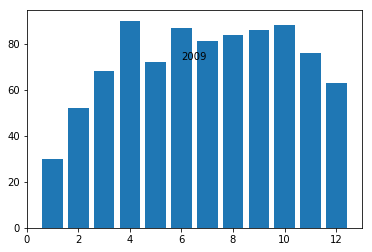

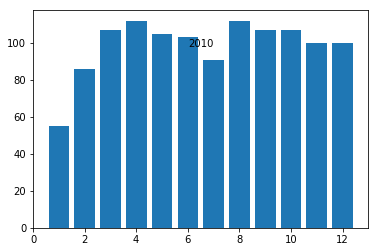

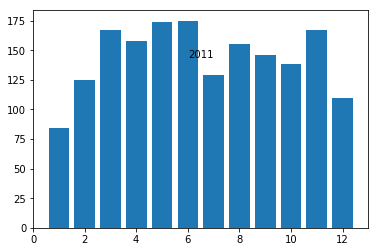

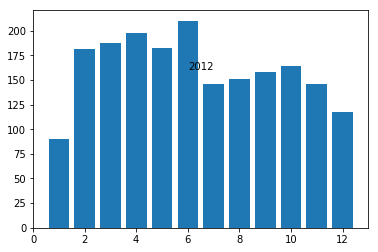

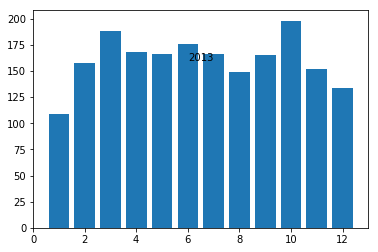

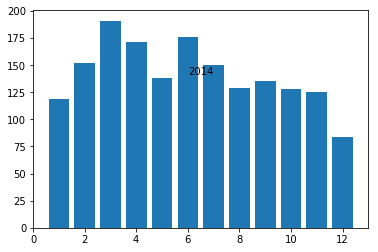

In [188]:
def monthly_analysis(year_lis):
    for year in year_lis:
        dfnew=df[(df['founding_year']==year) &(df['country_code']=='USA')]
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['founding_month']==month))
        plt.bar(range(1,13),monthly_count)
        plt.text(6,sum(monthly_count)//12 ,str(year))
        plt.show()
monthly_analysis(range(2000,2015))

In [182]:
investments=pd.read_csv('ece143/project/investments.csv')
investments.head(5)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0


In [183]:
investments['funded_at']=investments['funded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
investments['funding_year']=investments['funded_at'].apply(lambda x:x.year)
investments['funding_month']=investments['funded_at'].apply(lambda x:x.month)
investments['funding_day']=investments['funded_at'].apply(lambda x:x.day)

In [ ]:
# total investments patterns

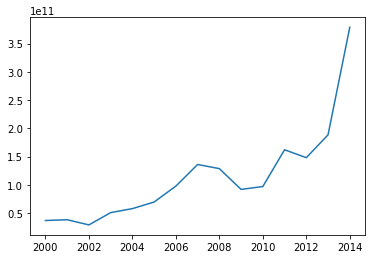

In [190]:
def get_year_wise_investments_plot(years=range(2000,2015), countries=True):
    count_list=[]
    if countries:
        for year in years:
            count_list.append(investments[investments['funding_year']==year]['raised_amount_usd'].sum())
    plt.plot(years,count_list)
    #add labels
get_year_wise_investments_plot()

In [ ]:
#number of investments each year patterns

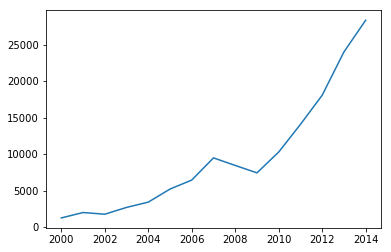

In [191]:
def get_year_wise_investments_plot(years=range(2000,2015), countries=True):
    count_list=[]
    if countries:
        for year in years:
            count_list.append(investments[investments['funding_year']==year].shape[0])
    plt.plot(years,count_list)
    #add labels
get_year_wise_investments_plot()

In [195]:
# amount of investments across each country pie chart

In [221]:
# WRT to investments in USA

In [225]:

investments_14=investments[(pd.notnull(investments['raised_amount_usd'])) & (investments['funding_year']==2014)]
country_investment=investments_14[['raised_amount_usd','company_country_code']].groupby('company_country_code').agg('sum')
countries=list(country_investment.index)
investment=country_investment['raised_amount_usd'].tolist()
ci_tuple=list(zip(countries,investment))
ci_tuple.sort(key= lambda x:x[1],reverse=True)
c,i=zip(*ci_tuple)
c=list(c)
i=list(i)
other_i=sum(i[5:])
c=c[:5]+['other']
i=i[:5]+[other_i]


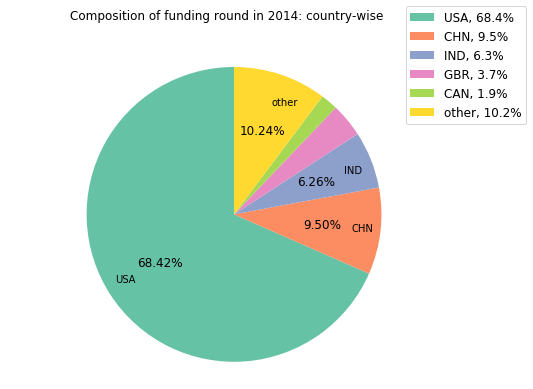

In [226]:
plot_pie_chart(c,i,'Composition of funding round in 2014: country-wise')

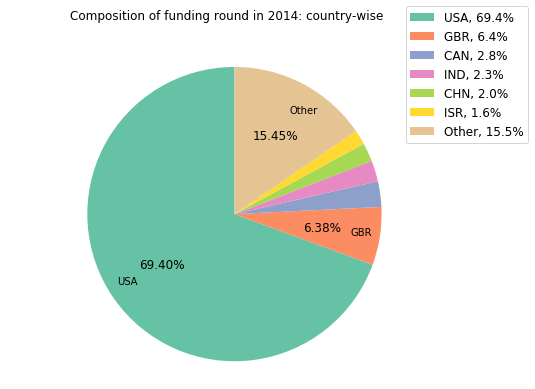

In [222]:
#number of investments across countries pie chart
pair=get_pie_data('company_country_code',investments[investments['funding_year']==2014])
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of funding round in 2014: country-wise')
    

In [89]:
#type of investments

In [ ]:
#amount of investments

In [227]:
investments=investments[(pd.notnull(investments['raised_amount_usd'])) & (investments['funding_year']==2014) ]
country_investment=investments[['raised_amount_usd','funding_round_type']].groupby('funding_round_type').agg('sum')
countries=list(country_investment.index)
investment=country_investment['raised_amount_usd'].tolist()
ci_tuple=list(zip(countries,investment))
ci_tuple.sort(key= lambda x:x[1],reverse=True)
c,i=zip(*ci_tuple)
c=list(c)
i=list(i)
other_i=sum(i[5:])
c=c[:5]+['other']
i=i[:5]+[other_i]


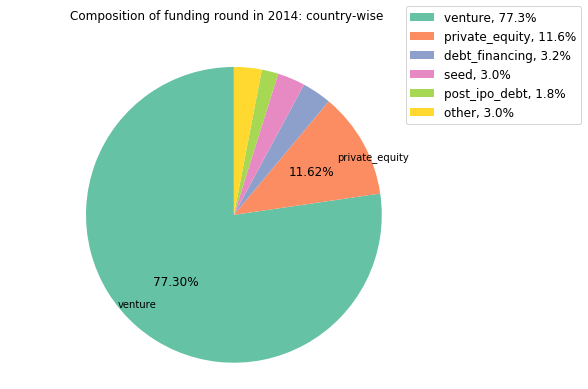

In [228]:
plot_pie_chart(c,i,'Composition of funding round in 2014: country-wise')

In [ ]:
#number of different types of investments

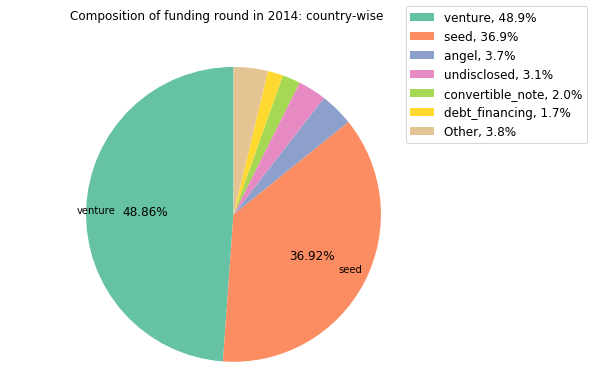

In [108]:
pair=get_pie_data('funding_round_type',investments[investments['funding_year']==2014])
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of funding round in 2014: country-wise')
    

In [ ]:
# investors in USA uinvesting inside vs outside of USA

In [236]:
american_investors=investments[investments['investor_country_code']=='USA']
#check the proportion of them investing in america
usa_investments=american_investors[american_investors['company_country_code']=='USA'].shape[0]
outside_investments=american_investors[american_investors['company_country_code']!='USA'].shape[0]
usa_investments*100.0/(outside_investments+usa_investments)

86.06823678392377

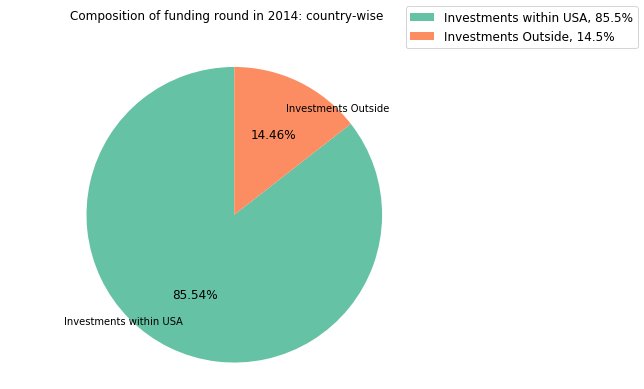

In [243]:
american_investors=investments[investments['investor_country_code']=='USA']
#check the proportion of them investing in america
usa_investments=american_investors[american_investors['company_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=american_investors[american_investors['company_country_code']!='USA']['raised_amount_usd'].sum()
usa_investments*100.0/(outside_investments+usa_investments)

l=['Investments within USA','Investments Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Composition of funding round in 2014: country-wise')


In [ ]:
# investors outside USA investing inside vs outside of USA

In [240]:
nonamerican_investors=investments[~(investments['investor_country_code']=='USA')]
#check the proportion of them investing in america
usa_investments=nonamerican_investors[nonamerican_investors['company_country_code']=='USA'].shape[0]
outside_investments=nonamerican_investors[nonamerican_investors['company_country_code']!='USA'].shape[0]
usa_investments*100.0/(outside_investments+usa_investments)

40.61073769811634

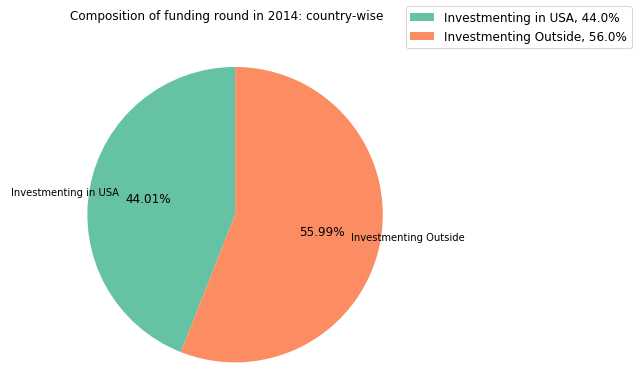

In [245]:
nonamerican_investors=investments[~(investments['investor_country_code']=='USA')]
#check the proportion of them investing in america
usa_investments=nonamerican_investors[nonamerican_investors['company_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=nonamerican_investors[nonamerican_investors['company_country_code']!='USA']['raised_amount_usd'].sum()
usa_investments*100.0/(outside_investments+usa_investments)

l=['Investmenting in USA','Investmenting Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Composition of funding round in 2014: country-wise')


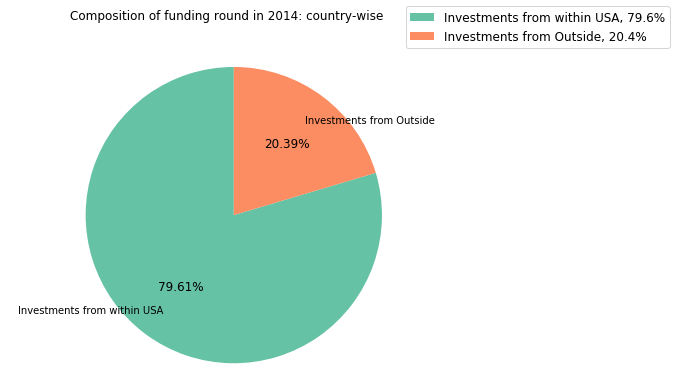

In [244]:
american_investments=investments[investments['company_country_code']=='USA']
#check the proportion of them investing inside vs outside
usa_investments=american_investments[american_investments['investor_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=american_investments[american_investments['investor_country_code']!='USA']['raised_amount_usd'].sum()
usa_investments*100.0/(outside_investments+usa_investments)


l=['Investments from within USA','Investments from Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Composition of funding round in 2014: country-wise')


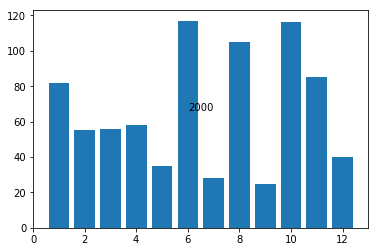

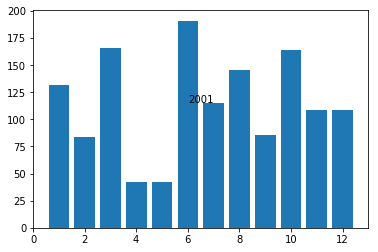

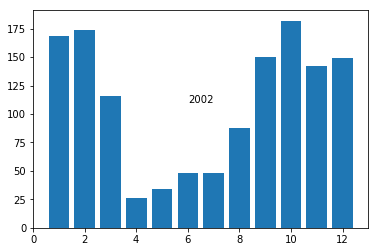

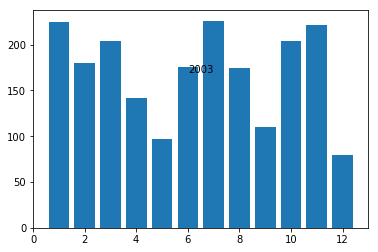

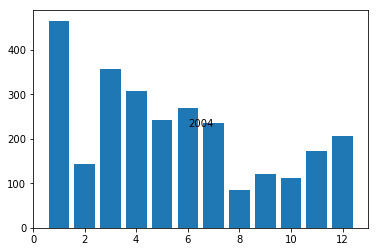

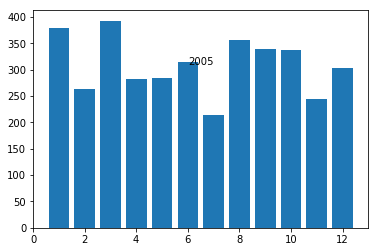

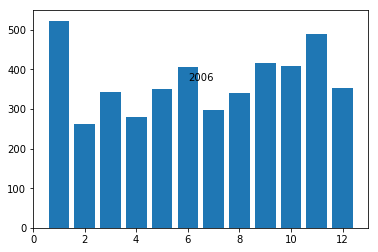

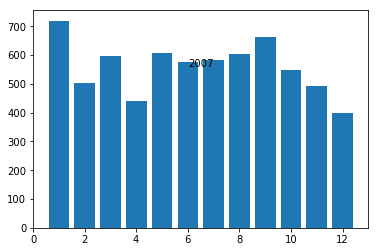

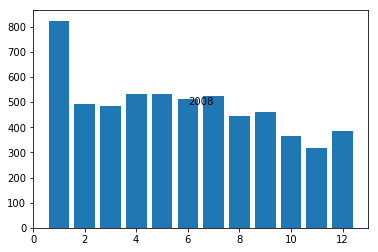

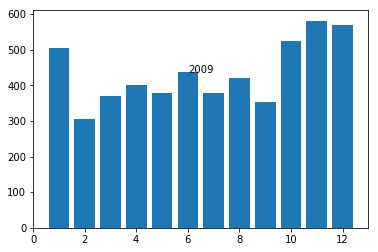

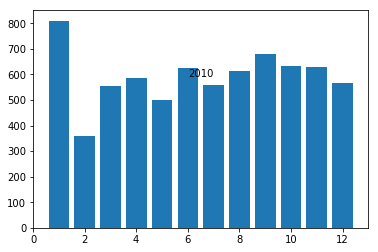

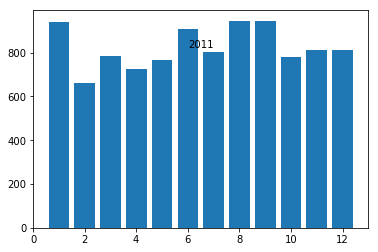

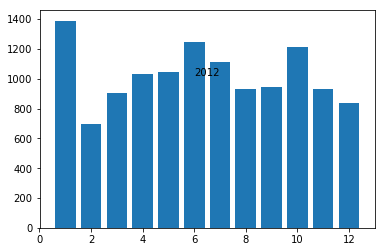

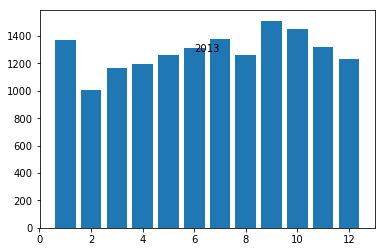

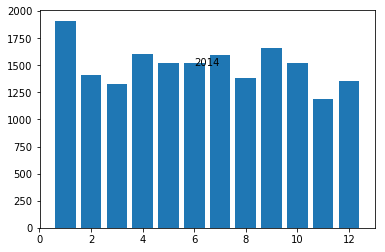

In [235]:
#monthly patterns
investments=pd.read_csv('ece143/project/investments.csv')
investments['funded_at']=investments['funded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
investments['funding_year']=investments['funded_at'].apply(lambda x:x.year)
investments['funding_month']=investments['funded_at'].apply(lambda x:x.month)
investments['funding_day']=investments['funded_at'].apply(lambda x:x.day)

def monthly_analysis(year_lis):
    for year in year_lis:
        dfnew=investments[(investments['funding_year']==year) & (investments['company_country_code']=='USA')]
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['funding_month']==month))
        plt.bar(range(1,13),monthly_count)
        plt.text(6,sum(monthly_count)//12 ,str(year))
        plt.show()
monthly_analysis(range(2000,2015))

In [249]:
#regionwise investors within US
investments = pd.read_csv('ece143/project/investments.csv')
investments = investments[investments['investor_country_code'] == 'USA']
investments = investments[pd.notnull(investments['investor_state_code'])]
plot_choropleth(state_data('investor_state_code',investments),'2014 US New Startups by State')


In [252]:
#regionwise investments 
investments = pd.read_csv('ece143/project/investments.csv')
investments = investments[investments['company_country_code'] == 'USA']
investments = investments[pd.notnull(investments['company_state_code'])]
plot_choropleth(state_data('company_state_code',investments),'2014 US New Startups by State')

In [ ]:
#try: for the top 3 see the yearly patterns

In [ ]:
# try: mixture of gaussians

In [ ]:
# when should they ideally take the first round of funding after they start a company

In [ ]:
#finding patterns in investors, fir that scatter plot of (number of investments, meadian of the investments)

In [ ]:
#further ananlysis of the extreme regions

In [ ]:
#seed fundings are less specific, venture fundings are specific and c3ompanies are also specific